In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

from tensorflow.keras.layers import Dense
from tensorflow.keras import Model
from tensorflow.keras import layers
from tensorflow import keras
import os
import sys
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import csv
import pickle
from scipy.stats import linregress
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from datetime import datetime
import numpy as np
from sklearn.preprocessing import Normalizer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor


2023-06-20 14:35:41.094370: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


TensorFlow version: 2.10.0


In [2]:
cd ..

/Users/hyakuzukamaya/Desktop/lab/judgement_system/script


In [3]:


# x_path = '../../data/npy/x_random_l3_6.npy'
x_path = '../../data/npy/x_random_l3_6_dv.npy'
# x_path = '../../data/npy/x_random_6_diffseq_mean_l3.npy'
# x_path = '../../data/npy/x_random_6_diffseq_mean_l3_3.npy'

# y_path = '../../data/npy/y_random_l3_6.npy'
y_path = '../../data/npy/y_random_l3_6_dv.npy'
# y_path = '../../data/npy/y_random_6_diffseq_mean_l3.npy'
# y_path = '../../data/npy/y_random_6_diffseq_mean_l3_3.npy'

# l3
x_l3_mean_fullPath = os.path.abspath('../../data/npy/x_random_l3_6_mean.npy')
x_l3_rb_fullPath = os.path.abspath('../../data/npy/x_random_l3_6_rb.npy')
x_l3_dv_fullPath = os.path.abspath('../../data/npy/x_random_l3_6_dv.npy')
x_l3_mean_path = tf.keras.utils.get_file('x_random_l3_6_mean.npy', 'file://'+x_l3_mean_fullPath)
x_l3_rb_path = tf.keras.utils.get_file('x_random_l3_6_mean.npy', 'file://'+x_l3_rb_fullPath)
x_l3_dv_path = tf.keras.utils.get_file('x_random_l3_6_mean.npy', 'file://'+x_l3_dv_fullPath)

y_l3_mean_fullPath = os.path.abspath('../../data/npy/y_random_l3_6_mean.npy')
y_l3_rb_fullPath = os.path.abspath('../../data/npy/y_random_l3_6_rb.npy')
y_l3_dv_fullPath = os.path.abspath('../../data/npy/y_random_l3_6_dv.npy')
y_l3_mean_path = tf.keras.utils.get_file('y_random_l3_6_mean.npy', 'file://'+y_l3_mean_fullPath)
y_l3_rb_path = tf.keras.utils.get_file('y_random_l3_6_rb.npy', 'file://'+y_l3_rb_fullPath)
y_l3_dv_path = tf.keras.utils.get_file('y_random_l3_6_dv.npy', 'file://'+y_l3_dv_fullPath)


x_data = np.load(x_l3_dv_path)
y_data = np.load(y_l3_dv_path, allow_pickle=True)

print(len(y_data))
print(y_data)

# min_val = y_data.min()
# max_val = y_data.max()

# y_data = (y_data - min_val)/(max_val - min_val)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

837
[ 8.65544145 14.43086969 11.54339638 11.54339638 11.54339638 17.31810228
 17.31810228 11.54339638  8.65544145 11.54339638  8.65544145 14.43086969
 11.54339638  8.65544145  8.65544145 14.43086969  8.65544145  8.65544145
  8.65544145 11.54339638  8.65544145  8.65544145 14.43086969  8.65544145
 11.54339638 11.54339638  8.65544145  8.65544145  8.65544145 17.31810228
  8.65544145  8.65544145 17.31810228 11.54339638 11.54339638  8.65544145
  8.65544145 14.43086969 11.54339638  8.65544145 14.43086969 11.54339638
 11.54339638  8.65544145  8.65544145 11.54339638  8.65544145  8.65544145
 11.54339638 11.54339638  8.65544145  8.65544145 14.43086969  8.65544145
  8.65544145 14.43086969  8.65544145 14.43086969 17.31810228 11.54339638
 11.54339638  8.65544145  8.65544145  8.65544145  8.65544145  8.65544145
 11.54339638  8.65544145 11.54339638  8.65544145  8.65544145 11.54339638
  8.65544145  8.65544145 14.43086969  8.65544145 11.54339638  8.65544145
  8.65544145 17.31810228  8.65544145  8.6554414

In [4]:
def randomforest_regressor(x_train, x_test, y_train, y_test):
    regr = RandomForestRegressor(max_depth=2, random_state=0)
    regr.fit(x_train, y_train)
    return regr


In [5]:
model = randomforest_regressor(x_train, x_test, y_train, y_test)

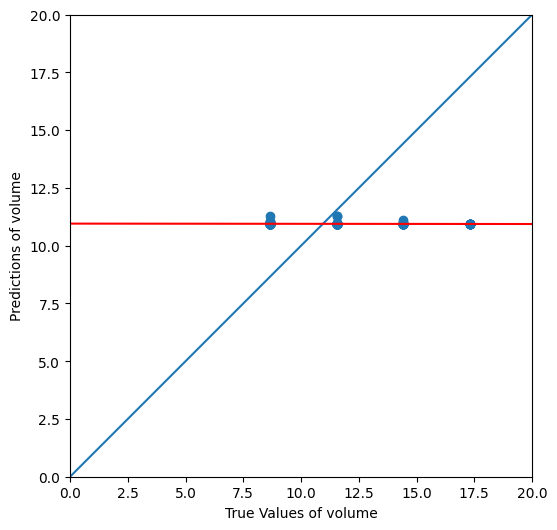

In [6]:
test_predictions = model.predict(x_test).flatten()
res = linregress(y_test, test_predictions)

plt.figure(figsize=(6,6))
plt.scatter(y_test, test_predictions)
# plt.xlabel('True Values [mc]')
# plt.ylabel('Predictions [mc]')
plt.xlabel('True Values of volume')
plt.ylabel('Predictions of volume')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,20])
plt.ylim([0,20])
_ = plt.plot([0,20], [0,20])

plt.plot([0,20], res.intercept + res.slope*np.array([0, 20]), 'r', label='fitted line')

# normalizer 学習前

In [8]:
mse = tf.keras.losses.MeanSquaredError()
test_predictions = model.predict(x_test).flatten()

mse(y_test,test_predictions).numpy()

6.973229670775269